In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

In [2]:
MoviesDataset = pd.read_csv("DataSets/movies_dataset_final.csv", sep=',')

In [3]:
MoviesDataset.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,Return
count,4.545100e+04,45451.000000,45451.000000,4.545100e+04,45205.000000,45451.000000,45451.000000,45366.000000,4.545100e+04
mean,4.231294e+06,107984.599745,2.926887,1.121930e+07,94.181905,5.624085,109.989703,1991.733567,6.589542e+02
std,1.742942e+07,112111.336735,6.006458,6.433984e+07,38.329504,1.915424,491.352336,28.954665,7.463165e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,0.000000e+00,26367.500000,0.389095,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59871.000000,1.131386,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156327.500000,3.694370,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


In [4]:
MoviesDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45451 non-null  float64
 1   id                 45451 non-null  int64  
 2   original_language  45440 non-null  object 
 3   overview           44510 non-null  object 
 4   popularity         45451 non-null  float64
 5   release_date       45451 non-null  object 
 6   revenue            45451 non-null  float64
 7   runtime            45205 non-null  float64
 8   status             45371 non-null  object 
 9   tagline            20425 non-null  object 
 10  title              45451 non-null  object 
 11  vote_average       45451 non-null  float64
 12  vote_count         45451 non-null  float64
 13  release_year       45366 non-null  float64
 14  Return             45451 non-null  float64
 15  collection_name    45451 non-null  object 
 16  genre_names        454

Graficos de correlacion entre todas las variables

C:\Users\Windows\AppData\Local\Temp\ipykernel_4192\961184606.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = MoviesDataset.corr(method='pearson')


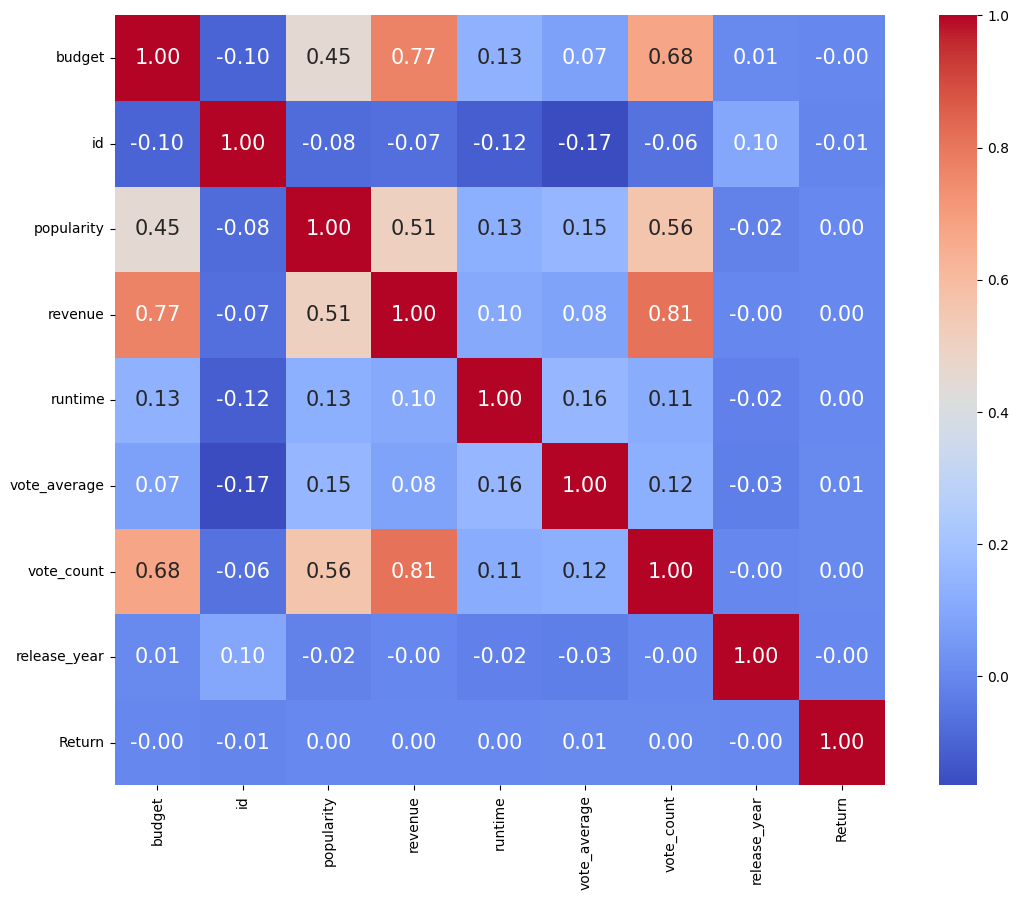

In [5]:
#Para ver el mapa de calor de las correlaciones entre las variables:

#Podemos notar que hay relaciones bastante fuertes entre revenue, budget, popularity y vote count,
#lo cual nos indica que, en la mayoría de los casos, a mayor inversión, mayor retorno y mayor aceptación por parte del público.

corr = MoviesDataset.corr(method='pearson')
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')

plt.show()

Revenue, budget y return

<Axes: xlabel='budget', ylabel='revenue'>

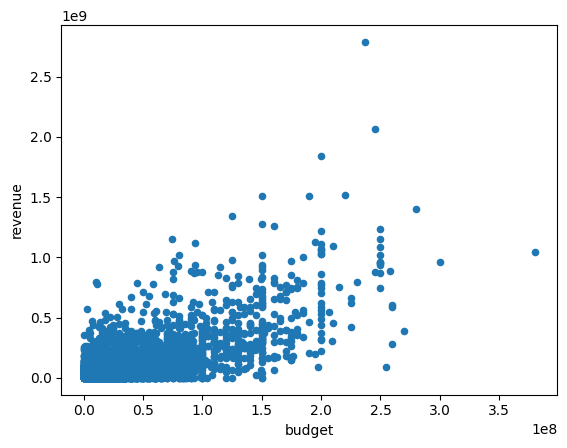

In [6]:
#Para ver la relación entre presupuesto e ingresos:

MoviesDataset.plot.scatter(x='budget', y='revenue')

In [7]:
#Para ver los máximos de las variables budget, revenue y return:

BudgetMax = MoviesDataset.budget.idxmax()

RevenueMax = MoviesDataset.revenue.idxmax()

ReturnMax = MoviesDataset["Return"].idxmax()

In [8]:
#Máximo de budget:
#Parece ser un outlier, el monto parece demasiado abultado para una pelicula de drama.
MoviesDataset.loc[BudgetMax]

budget                                                     380000000.0
id                                                                1865
original_language                                                   en
overview             Captain Jack Sparrow crosses paths with a woma...
popularity                                                    27.88772
release_date                                                2011-05-14
revenue                                                   1045713802.0
runtime                                                          136.0
status                                                        Released
tagline                                    Live Forever Or Die Trying.
title                      Pirates of the Caribbean: On Stranger Tides
vote_average                                                       6.4
vote_count                                                      5068.0
release_year                                                    1953.0
Return

In [9]:
#Máximo de revenue:
#La película con el volumen de ingresos más alto es Avatar.
MoviesDataset.loc[RevenueMax]

budget                                                     237000000.0
id                                                               19995
original_language                                                   en
overview             In the 22nd century, a paraplegic Marine is di...
popularity                                                  185.070892
release_date                                                2009-12-10
revenue                                                   2787965087.0
runtime                                                          162.0
status                                                        Released
tagline                                    Enter the World of Pandora.
title                                                           Avatar
vote_average                                                       7.2
vote_count                                                     12114.0
release_year                                                    2009.0
Return

In [10]:
#Máximo de return:

MoviesDataset.loc[ReturnMax]

budget                                                             1.0
id                                                               13703
original_language                                                   en
overview             A college freshman returns to Los Angeles for ...
popularity                                                    4.028679
release_date                                                1987-11-06
revenue                                                     12396383.0
runtime                                                           98.0
status                                                        Released
tagline              In Beverly Hills, you can have anything your h...
title                                                   Less Than Zero
vote_average                                                       6.1
vote_count                                                        77.0
release_year                                                    1987.0
Return

<Axes: xlabel='budget', ylabel='Return'>

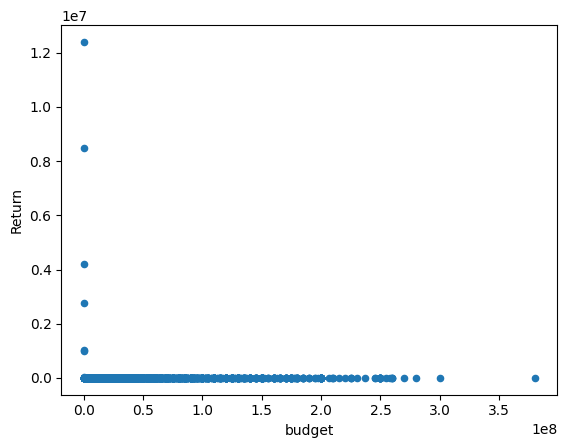

In [11]:
#Con un scatter entre presupuesto y retorno podemos ver que los valores atípicos de la variable return,
#se dan por valores de budget muy bajos,
#un procedimiento inteligente sería borrar estos valores atípicos, teniendo en cuenta un límite inferior para la variable budget.

MoviesDataset.plot.scatter(x='budget', y='Return')

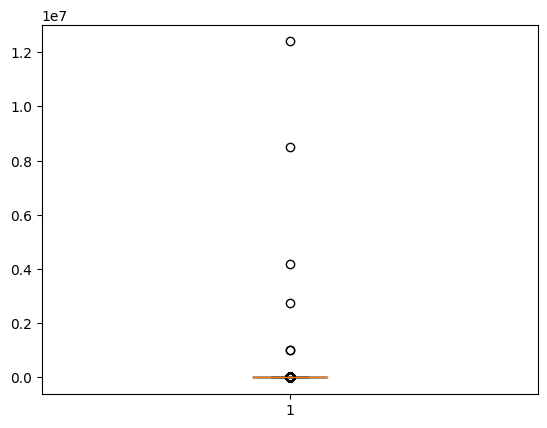

In [29]:
#Diagrama de cajas para ver los outliers de return:

plt.boxplot(MoviesDataset['Return'])

plt.show()

Vote Average y Popularity

<Axes: xlabel='vote_average', ylabel='popularity'>

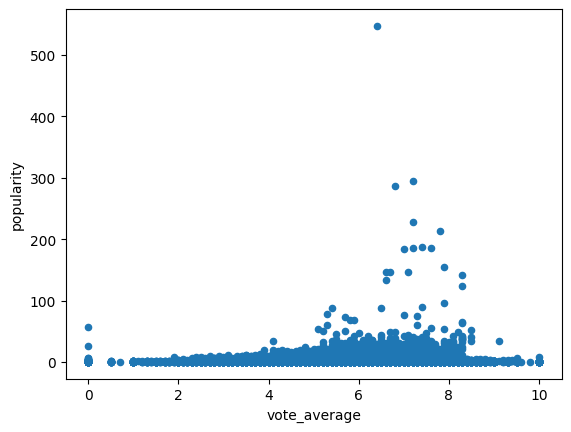

In [12]:
#Para ver la relación entre vote_average y popularity:

MoviesDataset.plot.scatter(x='vote_average', y='popularity')

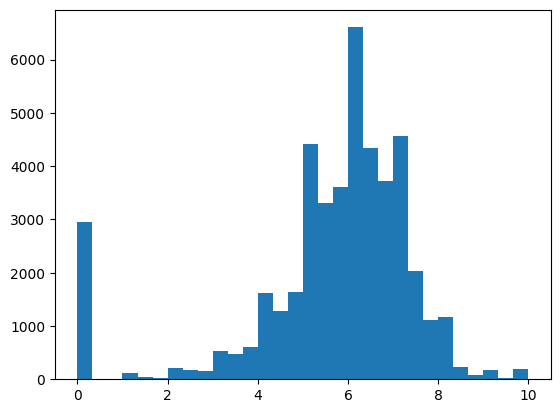

In [13]:
#Para ver un histograma de frecuencias de los votos promedio de las películas:
plt.hist(MoviesDataset["vote_average"], bins=30)

plt.show()

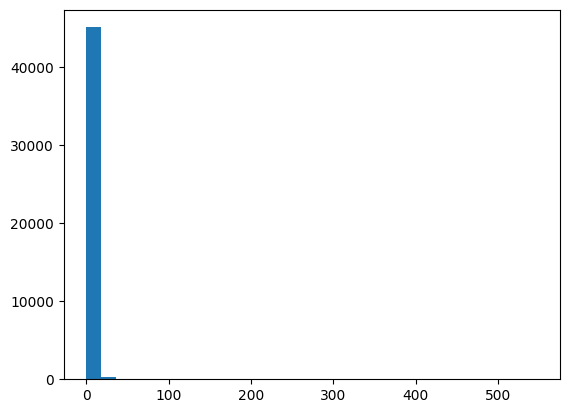

In [14]:
#Para ver un histograma de frecuencias de los votos promedio de las películas:
#Vemos que hay outliers.
plt.hist(MoviesDataset["popularity"], bins=30)

plt.show()

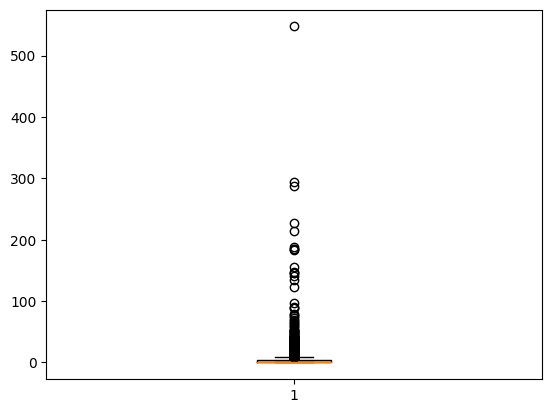

In [15]:
#Diagrama de cajas para ver los outliers de popularity:

plt.boxplot(MoviesDataset['popularity'])

plt.show()

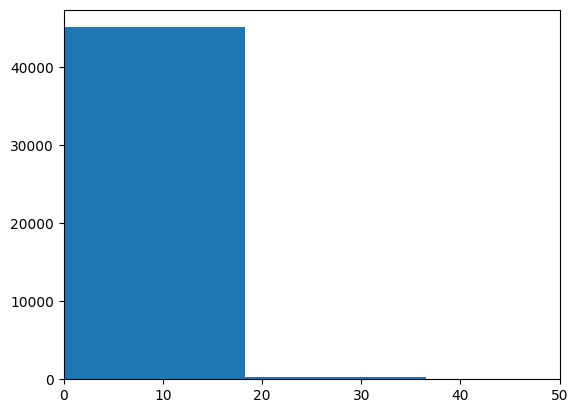

In [16]:
#Para ver un histograma de frecuencias de los votos promedio de las películas sin outliers:
plt.hist(MoviesDataset["popularity"], bins=30)
plt.xlim(0, 50)

plt.show()

In [17]:
#Para ver el valor máximo de popularity:
#La película con mayor popularidad es Minions.

PopularityMax = MoviesDataset["popularity"].idxmax()

MoviesDataset.loc[PopularityMax]

budget                                                      74000000.0
id                                                              211672
original_language                                                   en
overview             Minions Stuart, Kevin and Bob are recruited by...
popularity                                                  547.488298
release_date                                                2015-06-17
revenue                                                   1156730962.0
runtime                                                           91.0
status                                                        Released
tagline                   Before Gru, they had a history of bad bosses
title                                                          Minions
vote_average                                                       6.4
vote_count                                                      4729.0
release_year                                                    2008.0
Return

In [18]:
#Para ver el máximo de vote_average:

VoteAverageMax = MoviesDataset["vote_average"].idxmax()

MoviesDataset.loc[VoteAverageMax]

budget                                                             0.0
id                                                               58372
original_language                                                   en
overview             On Christmas eve, a relentlessly cheerful woma...
popularity                                                    0.119713
release_date                                                1995-11-17
revenue                                                            0.0
runtime                                                           91.0
status                                                        Released
tagline                               The most twisted Christmas ever.
title                                                         Reckless
vote_average                                                      10.0
vote_count                                                         1.0
release_year                                                    1995.0
Return

Release year y revenue

(1900.0, 2022.0)

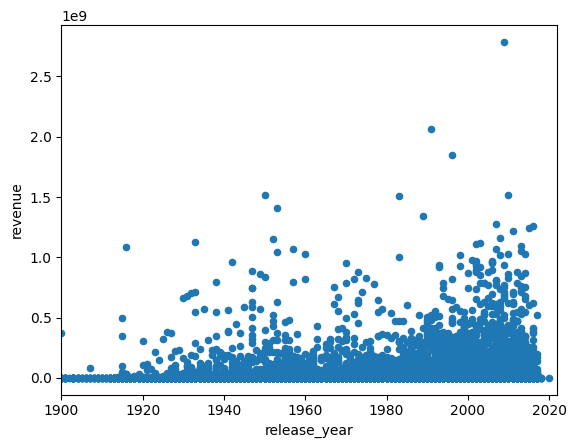

In [19]:
#Para ver la relación entre el año de estreno y los ingresos,
#vemos que la industria del cine aumentó sus ingresos considerablemente a través de los años:

MoviesDataset.plot.scatter(x='release_year', y='revenue')

plt.xlim(1900, 2022)

Frecuencias lenguajes, companias y países:

In [20]:
#Para ver que cantidad de películas hay en cada idioma, podemos ver que el inglés es, por mucho, el lenguaje más común,
#seguido por el francés y el italiano:

from collections import Counter

lenguajes = MoviesDataset["original_language"]

frecuencias = Counter(lenguajes)

frecuencias_ordenadas = frecuencias.most_common()

limit = 100
count = 0

for lenguajes, frecuencia in frecuencias_ordenadas:
    if count >= limit:
        break  # Rompe el bucle cuando se alcanza el límite de elementos
    print(f"Lenguaje: {lenguajes}, Frecuencia: {frecuencia}")
    count += 1

Lenguaje: en, Frecuencia: 32249
Lenguaje: fr, Frecuencia: 2442
Lenguaje: it, Frecuencia: 1528
Lenguaje: ja, Frecuencia: 1355
Lenguaje: de, Frecuencia: 1081
Lenguaje: es, Frecuencia: 991
Lenguaje: ru, Frecuencia: 822
Lenguaje: hi, Frecuencia: 508
Lenguaje: ko, Frecuencia: 444
Lenguaje: zh, Frecuencia: 408
Lenguaje: sv, Frecuencia: 386
Lenguaje: pt, Frecuencia: 315
Lenguaje: cn, Frecuencia: 313
Lenguaje: fi, Frecuencia: 301
Lenguaje: nl, Frecuencia: 247
Lenguaje: da, Frecuencia: 227
Lenguaje: pl, Frecuencia: 218
Lenguaje: tr, Frecuencia: 150
Lenguaje: cs, Frecuencia: 130
Lenguaje: el, Frecuencia: 113
Lenguaje: no, Frecuencia: 106
Lenguaje: fa, Frecuencia: 102
Lenguaje: hu, Frecuencia: 100
Lenguaje: th, Frecuencia: 78
Lenguaje: ta, Frecuencia: 78
Lenguaje: he, Frecuencia: 67
Lenguaje: sr, Frecuencia: 63
Lenguaje: ro, Frecuencia: 57
Lenguaje: te, Frecuencia: 45
Lenguaje: ar, Frecuencia: 39
Lenguaje: ml, Frecuencia: 36
Lenguaje: xx, Frecuencia: 34
Lenguaje: bn, Frecuencia: 29
Lenguaje: hr, 

In [21]:
#Para ver la frecuencia de los generos:

genres = MoviesDataset["genre_names"]

frecuencias = Counter(genres)

frecuencias_ordenadas = frecuencias.most_common()

limit = 100
count = 0

for genres, frecuencia in frecuencias_ordenadas:
    if count >= limit:
        break  # Rompe el bucle cuando se alcanza el límite de elementos
    print(f"Lenguaje: {genres}, Frecuencia: {frecuencia}")
    count += 1

Lenguaje: ['Drama'], Frecuencia: 5003
Lenguaje: ['Comedy'], Frecuencia: 3620
Lenguaje: ['Documentary'], Frecuencia: 2713
Lenguaje: [], Frecuencia: 2460
Lenguaje: ['Drama', 'Romance'], Frecuencia: 1303
Lenguaje: ['Comedy', 'Drama'], Frecuencia: 1135
Lenguaje: ['Horror'], Frecuencia: 973
Lenguaje: ['Comedy', 'Romance'], Frecuencia: 933
Lenguaje: ['Comedy', 'Drama', 'Romance'], Frecuencia: 592
Lenguaje: ['Drama', 'Comedy'], Frecuencia: 533
Lenguaje: ['Horror', 'Thriller'], Frecuencia: 529
Lenguaje: ['Drama', 'Thriller'], Frecuencia: 498
Lenguaje: ['Thriller'], Frecuencia: 465
Lenguaje: ['Crime', 'Drama'], Frecuencia: 430
Lenguaje: ['Romance', 'Drama'], Frecuencia: 340
Lenguaje: ['Western'], Frecuencia: 318
Lenguaje: ['Action', 'Thriller'], Frecuencia: 301
Lenguaje: ['Drama', 'Foreign'], Frecuencia: 282
Lenguaje: ['Action'], Frecuencia: 279
Lenguaje: ['Drama', 'History'], Frecuencia: 268
Lenguaje: ['Action', 'Comedy'], Frecuencia: 242
Lenguaje: ['Animation'], Frecuencia: 242
Lenguaje: ['Cr

In [22]:
#Para ver la frecuencia de cada compania, vemos que hay muchos valores faltantes en los datos de las companias:

companias = MoviesDataset["companies_names"]

frecuencias = Counter(companias)

frecuencias_ordenadas = frecuencias.most_common()

limit = 100
count = 0

for companias, frecuencia in frecuencias_ordenadas:
    if count >= limit:
        break  # Rompe el bucle cuando se alcanza el límite de elementos
    print(f"Lenguaje: {companias}, Frecuencia: {frecuencia}")
    count += 1

Lenguaje: [], Frecuencia: 11870
Lenguaje: ['Metro-Goldwyn-Mayer (MGM)'], Frecuencia: 742
Lenguaje: ['Warner Bros.'], Frecuencia: 541
Lenguaje: ['Paramount Pictures'], Frecuencia: 506
Lenguaje: ['Twentieth Century Fox Film Corporation'], Frecuencia: 438
Lenguaje: ['Universal Pictures'], Frecuencia: 319
Lenguaje: ['RKO Radio Pictures'], Frecuencia: 247
Lenguaje: ['Columbia Pictures Corporation'], Frecuencia: 207
Lenguaje: ['Columbia Pictures'], Frecuencia: 148
Lenguaje: ['Mosfilm'], Frecuencia: 144
Lenguaje: ['Walt Disney Pictures'], Frecuencia: 85
Lenguaje: ['Universal International Pictures (UI)'], Frecuencia: 82
Lenguaje: ['New Line Cinema'], Frecuencia: 75
Lenguaje: ['Walt Disney Productions'], Frecuencia: 75
Lenguaje: ['Touchstone Pictures'], Frecuencia: 70
Lenguaje: ['Shaw Brothers'], Frecuencia: 69
Lenguaje: ['Toho Company'], Frecuencia: 65
Lenguaje: ['TriStar Pictures'], Frecuencia: 62
Lenguaje: ['Orion Pictures'], Frecuencia: 61
Lenguaje: ['Hammer Film Productions'], Frecuencia:

In [23]:
#Para ver la frecuencia de los países productores de películas, vemos que la mayoría de las películas se filman en USA:

countries = MoviesDataset["countries_names"]

frecuencias = Counter(countries)

frecuencias_ordenadas = frecuencias.most_common()

limit = 100
count = 0

for countries, frecuencia in frecuencias_ordenadas:
    if count >= limit:
        break  # Rompe el bucle cuando se alcanza el límite de elementos
    print(f"Lenguaje: {countries}, Frecuencia: {frecuencia}")
    count += 1

Lenguaje: ['United States of America'], Frecuencia: 17854
Lenguaje: [], Frecuencia: 6290
Lenguaje: ['United Kingdom'], Frecuencia: 2238
Lenguaje: ['France'], Frecuencia: 1647
Lenguaje: ['Japan'], Frecuencia: 1357
Lenguaje: ['Italy'], Frecuencia: 1031
Lenguaje: ['Canada'], Frecuencia: 838
Lenguaje: ['Germany'], Frecuencia: 750
Lenguaje: ['India'], Frecuencia: 736
Lenguaje: ['Russia'], Frecuencia: 717
Lenguaje: ['United Kingdom', 'United States of America'], Frecuencia: 569
Lenguaje: ['South Korea'], Frecuencia: 435
Lenguaje: ['Spain'], Frecuencia: 399
Lenguaje: ['Hong Kong'], Frecuencia: 364
Lenguaje: ['Canada', 'United States of America'], Frecuencia: 364
Lenguaje: ['Australia'], Frecuencia: 336
Lenguaje: ['Sweden'], Frecuencia: 332
Lenguaje: ['Finland'], Frecuencia: 270
Lenguaje: ['France', 'Italy'], Frecuencia: 235
Lenguaje: ['Germany', 'United States of America'], Frecuencia: 215
Lenguaje: ['Poland'], Frecuencia: 214
Lenguaje: ['Brazil'], Frecuencia: 208
Lenguaje: ['Denmark'], Frecu

Title y Overview

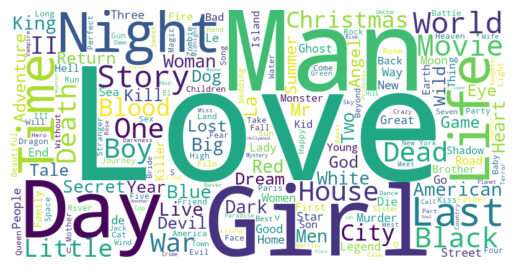

In [24]:
#Para generar una nube de las palabras más utilizadas en los títulos:

Titulos = MoviesDataset["title"].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Titulos)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

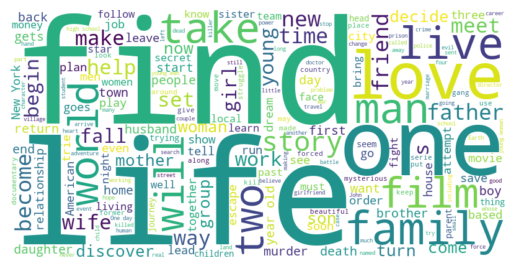

In [25]:
#Hacemos lo mismo para la columna overview:

Overviews = MoviesDataset["overview"].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Overviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [26]:
#Vamos a revisar los largos de las reseñas y que tienen datos erroneos:
#Creamos dos listas y las completamos con un ciclo for, una con los largos y otra con los valores erroneos.

ExtensionesOverview = []
OverviewsErroneos = []

for i in range(len(MoviesDataset)):
    if type(MoviesDataset["overview"][i]) == str:
        ExtensionesOverview.append(len(MoviesDataset["overview"][i]))
    elif type(MoviesDataset["overview"][i]) != str:
        ExtensionesOverview.append(0)
        OverviewsErroneos.append((MoviesDataset["overview"][i],i))

In [27]:
#Podemos ver que los datos erroneos de la columna overview son datos faltantes, nulos:

OverviewsErroneos[:50]

[(nan, 32),
 (nan, 300),
 (nan, 634),
 (nan, 635),
 (nan, 641),
 (nan, 644),
 (nan, 682),
 (nan, 793),
 (nan, 803),
 (nan, 822),
 (nan, 833),
 (nan, 867),
 (nan, 1029),
 (nan, 1083),
 (nan, 1396),
 (nan, 1417),
 (nan, 2146),
 (nan, 2200),
 (nan, 4140),
 (nan, 4765),
 (nan, 4809),
 (nan, 5975),
 (nan, 6032),
 (nan, 6260),
 (nan, 8588),
 (nan, 9017),
 (nan, 9200),
 (nan, 9449),
 (nan, 9654),
 (nan, 10035),
 (nan, 10641),
 (nan, 10724),
 (nan, 11642),
 (nan, 12008),
 (nan, 12973),
 (nan, 13250),
 (nan, 13611),
 (nan, 13614),
 (nan, 13625),
 (nan, 13707),
 (nan, 13712),
 (nan, 13719),
 (nan, 13773),
 (nan, 13809),
 (nan, 13815),
 (nan, 13857),
 (nan, 14066),
 (nan, 14087),
 (nan, 14127),
 (nan, 14151)]

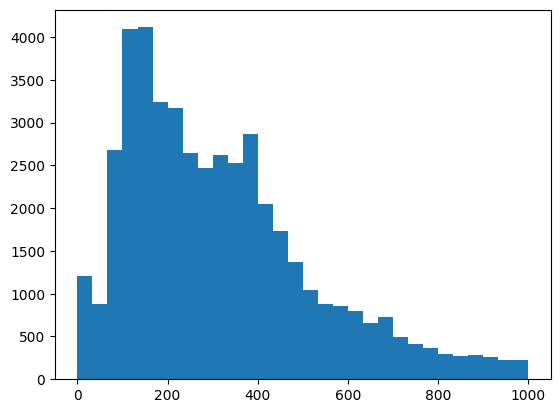

In [28]:
#Para ver un histograma de frecuencias de los largos de las reseñas:
#Vemos que la gran mayoria oscila cerca de las 200 palabras y se extienden hasta 1000 que parece ser el maximo.

plt.hist(ExtensionesOverview, bins=30)

plt.show()